In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Understand the dataset

In [2]:
# Import the dataset
df=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [3]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [4]:
# Visualize the dataset
df.shape

(300698, 53)

In [5]:
# Print the columns of the DataFrame
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
# Identify the variables with null values

null=df.isna().sum()

null=pd.DataFrame(null)
null

,0
Unique Key,0
Created Date,0
Closed Date,2164
Agency,0
Agency Name,0
Complaint Type,0
Descriptor,5914
Location Type,131
Incident Zip,2615
Incident Address,44410


# Perform basic data exploratory analysis

In [7]:
# Draw a frequency plot to show the number of null values in 
# each column of the DataFrame

<AxesSubplot:>

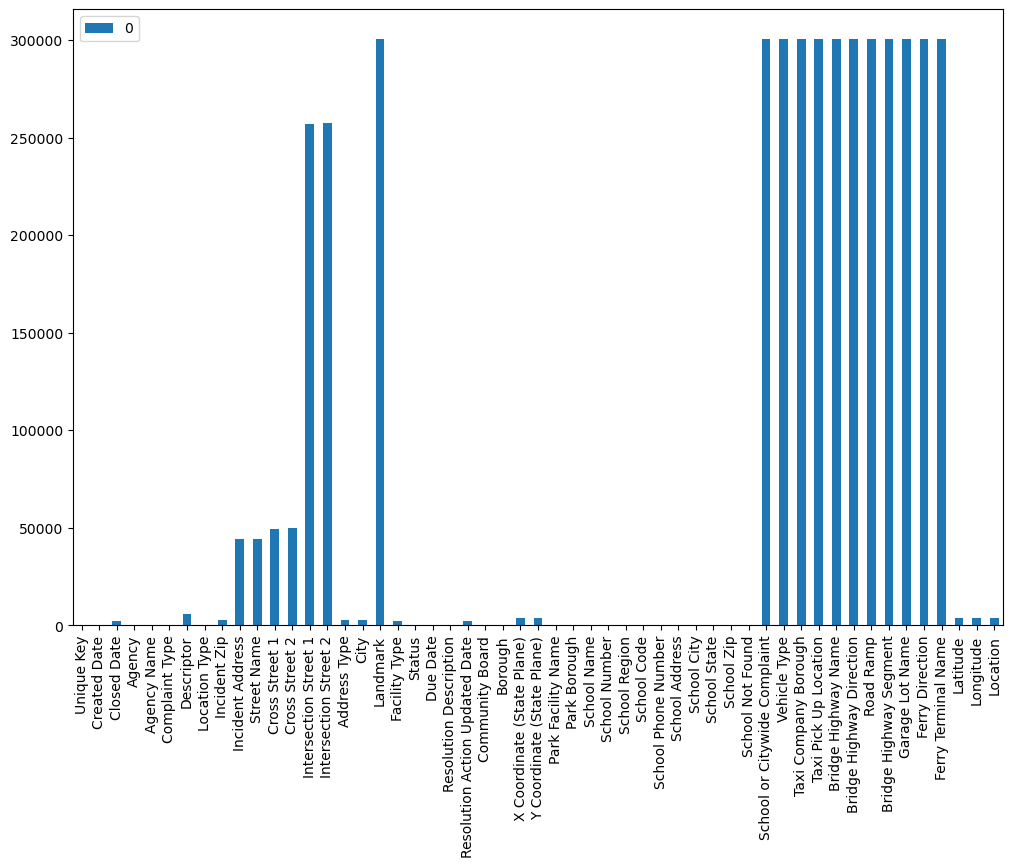

In [8]:
null.plot(kind='bar',figsize=(12,8))

# Missing value treatment

In [9]:
# Remove the records whose Closed Date values are 
# null

In [10]:
df.dropna(subset=['Closed Date'],inplace=True)

In [11]:
 df.isna().sum().any()

True

# Analyze the date column, and remove entries that have an incorrect timeline


In [12]:
df['Created Date']

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
300692    03/29/2015 12:34:32 AM
300694    03/29/2015 12:33:28 AM
300695    03/29/2015 12:33:03 AM
300696    03/29/2015 12:33:02 AM
300697    03/29/2015 12:33:01 AM
Name: Created Date, Length: 298534, dtype: object

In [13]:
df_created_date=pd.to_datetime(df['Created Date'])   # convert to datetime
df_created_date

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
300692   2015-03-29 00:34:32
300694   2015-03-29 00:33:28
300695   2015-03-29 00:33:03
300696   2015-03-29 00:33:02
300697   2015-03-29 00:33:01
Name: Created Date, Length: 298534, dtype: datetime64[ns]

In [14]:
df_closed_date=pd.to_datetime(df['Closed Date'])   # convert to datetime
df_closed_date

0        2016-01-01 00:55:00
1        2016-01-01 01:26:00
2        2016-01-01 04:51:00
3        2016-01-01 07:43:00
4        2016-01-01 03:24:00
                 ...        
300692   2015-03-29 01:13:01
300694   2015-03-29 02:33:59
300695   2015-03-29 03:40:20
300696   2015-03-29 04:38:35
300697   2015-03-29 04:41:50
Name: Closed Date, Length: 298534, dtype: datetime64[ns]

In [15]:
# Calculate the time elapsed in closed and creation date

In [16]:
df_time_elapsed=df_closed_date-df_created_date
df_time_elapsed=pd.DataFrame(df_time_elapsed)
df_time_elapsed

,0
0,0 days 00:55:15
1,0 days 01:26:16
2,0 days 04:51:31
3,0 days 07:45:14
4,0 days 03:27:02
...,...
300692,0 days 00:38:29
300694,0 days 02:00:31
300695,0 days 03:07:17
300696,0 days 04:05:33


In [17]:
df_time_elapsed.set_axis(['Time'],axis=1,inplace=True)    # Change column name
                                                          # use axis=1 for column

In [18]:
df_time_elapsed

,Time
0,0 days 00:55:15
1,0 days 01:26:16
2,0 days 04:51:31
3,0 days 07:45:14
4,0 days 03:27:02
...,...
300692,0 days 00:38:29
300694,0 days 02:00:31
300695,0 days 03:07:17
300696,0 days 04:05:33


In [19]:
#  Convert the calculated date to seconds to get a better 
#  representation

In [20]:
df_time_elapsed_sec=df_time_elapsed['Time'].dt.seconds
df['closing_time_seconds']=df_time_elapsed_sec
df['closing_time_seconds']

0          3315
1          5176
2         17491
3         27914
4         12422
          ...  
300692     2309
300694     7231
300695    11237
300696    14733
300697    14929
Name: closing_time_seconds, Length: 298534, dtype: int64

In [21]:
# View the descriptive statistics for the newly created column
df_time_elapsed_sec.describe()


count    298534.000000
mean      14145.827839
std       13897.164411
min           0.000000
25%        4560.000000
50%        9678.000000
75%       18960.000000
max       86395.000000
Name: Time, dtype: float64

In [22]:
# Check the number of null values in the Complaint_Type
# and City columns

In [23]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [24]:
df['Complaint Type'].isna().sum()

0

In [25]:
df['City'].isna().sum()

506

In [26]:
# Impute the NA value with Unknown City

In [27]:
df['City'].fillna('Unknon City',inplace=True)

In [28]:
df['City'].isna().sum()

0

In [29]:
# Draw a frequency plot for the complaints in each city

In [30]:
df1=pd.crosstab(df['City'],df['Complaint Type'])
df1

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,38,0,0,35,27,2,1,1,4,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,0,125,0,15,2618,351,3,35,4,32,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,0,116,12,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,0,37,0,0,377,198,1,1,3,2,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,0,7,0,1,95,89,2,1,0,1,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1415,0,20,12754,1952,63,188,9,247,...,79,547,8890,3396,19,17,0,355,51,379
BROOKLYN,0,2394,0,111,28147,5179,72,257,43,857,...,340,1555,13354,5176,49,45,0,1085,136,515
CAMBRIA HEIGHTS,0,11,0,0,147,115,0,0,0,5,...,2,0,25,77,0,0,0,6,0,0


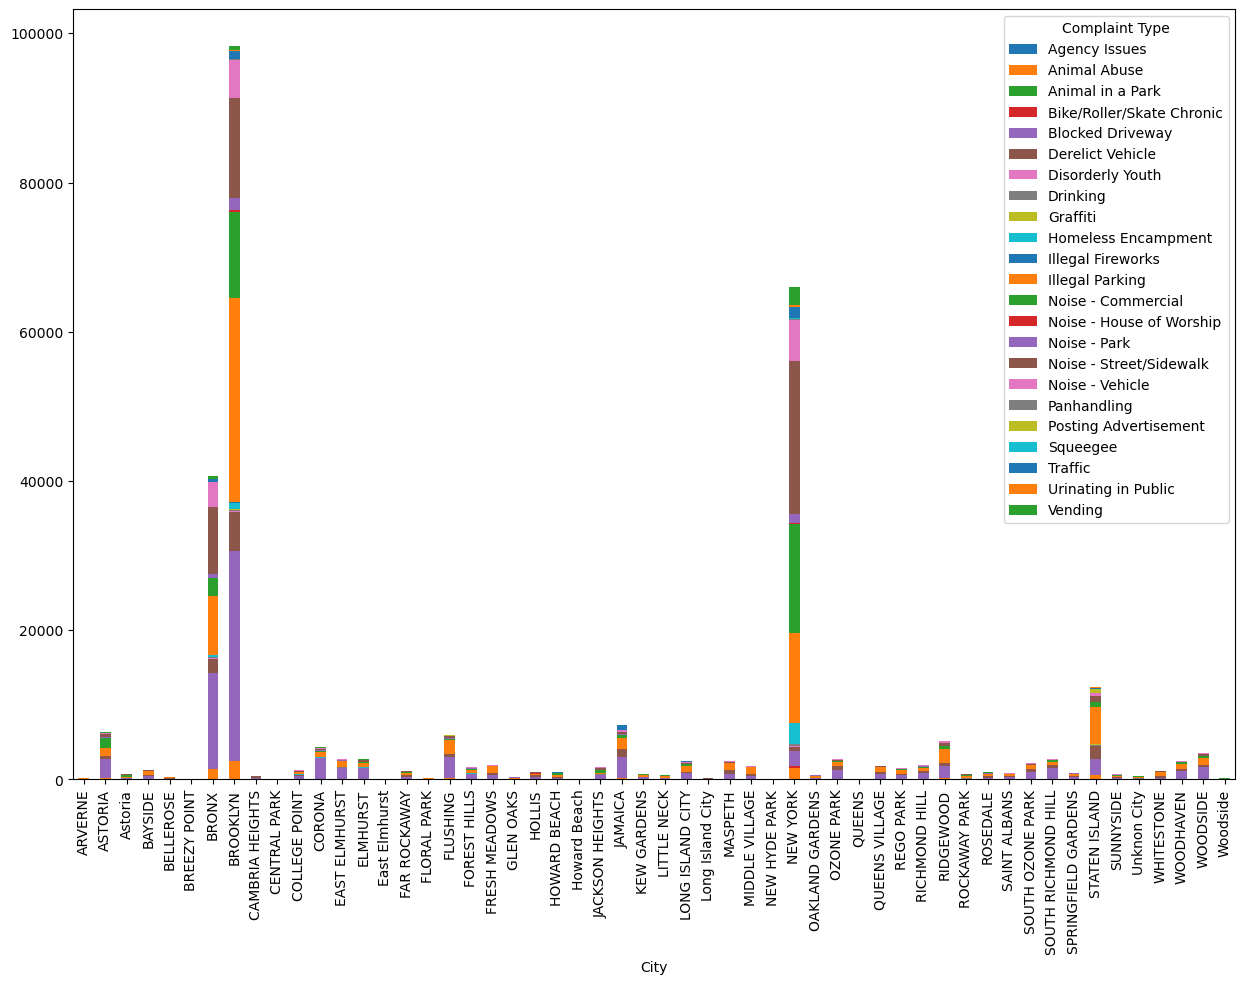

In [31]:
df1.plot(kind='bar',stacked=True,figsize=(15,10))
plt.show()

In [32]:
#  Create a scatter and hexbin plot of the concentration of 
#  complaints across Brooklyn

In [33]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,closing_time_seconds
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",2309
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",7231
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",11237
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",14733


In [34]:
df_brook=df[['Longitude','Latitude']].loc[(df.City == 'BROOKLYN')]
df_brook

,Longitude,Latitude
5,-73.992568,40.660823
9,-73.999539,40.623793
13,-73.874505,40.687511
17,-73.983430,40.679154
18,-73.930202,40.616550
...,...,...
300681,-73.963355,40.679237
300682,-73.964001,40.712285
300683,-73.963309,40.679226
300689,-73.929417,40.680399


In [35]:
# scatter plot

(-74.0502496795, -73.8464966905, 40.561126849, 40.789798391)

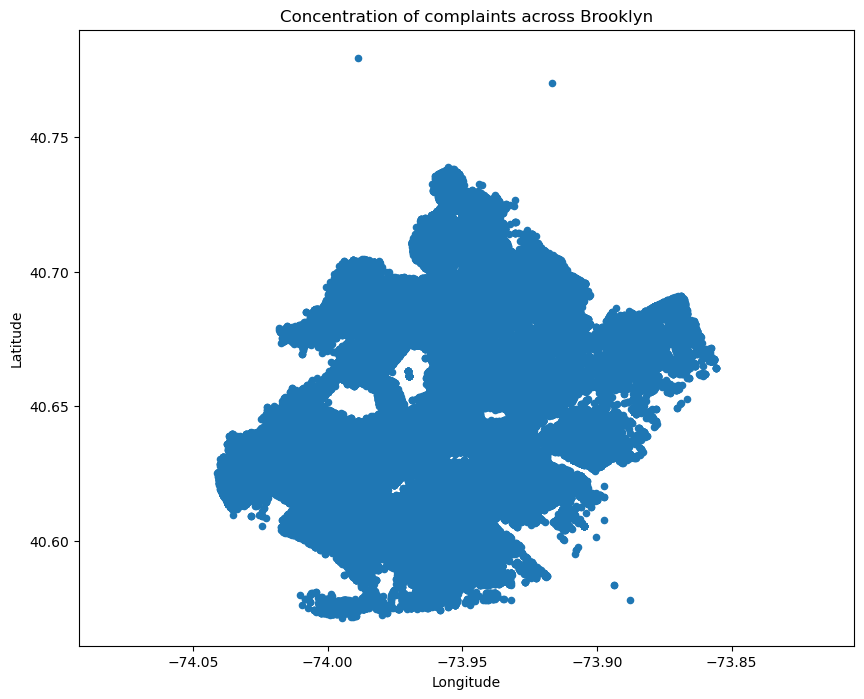

In [36]:
df_brook[['Longitude','Latitude']].plot(kind='scatter',x='Longitude',y='Latitude',figsize=(10,8),title='Concentration of complaints across Brooklyn').axis('equal')

In [37]:
# hexbin plot

(-74.05024967970374, -73.84649669029626, 40.561126849, 40.789798391)

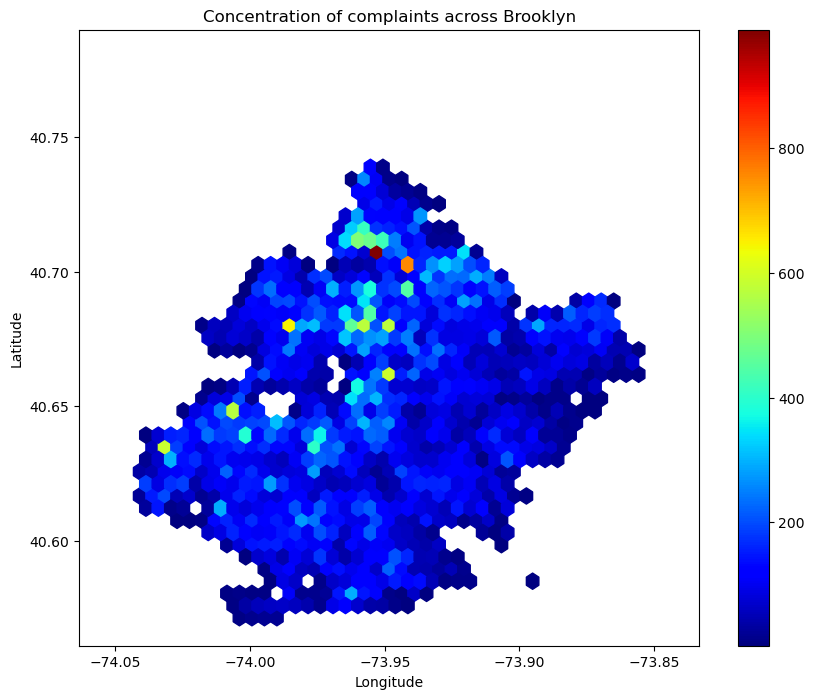

In [38]:
df_brook[['Longitude','Latitude']].plot(kind='hexbin',x='Longitude',y='Latitude',figsize=(10,8),mincnt=2,gridsize=40,colormap='jet',title='Concentration of complaints across Brooklyn').axis('equal')

# Find major types of complaints

In [39]:
# Plot a bar graph to show the types of complaints

<AxesSubplot:>

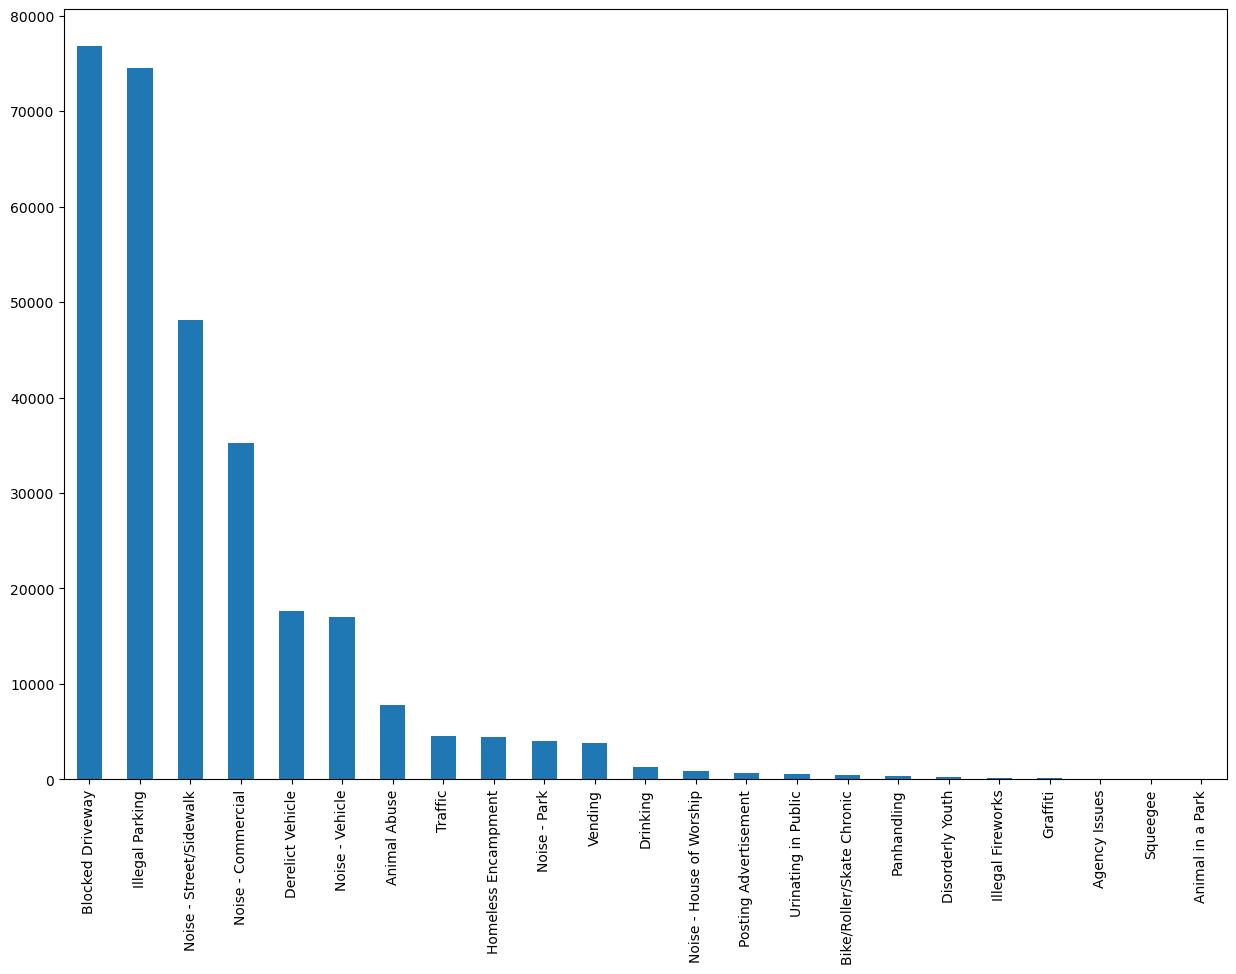

In [40]:
df['Complaint Type'].value_counts().plot(kind='bar',figsize=(15,10))

In [41]:
# Check the frequency of various types of complaints for New 
# York City

In [42]:
df['Complaint Type']

0         Noise - Street/Sidewalk
1                Blocked Driveway
2                Blocked Driveway
3                 Illegal Parking
4                 Illegal Parking
                   ...           
300692         Noise - Commercial
300694           Blocked Driveway
300695         Noise - Commercial
300696         Noise - Commercial
300697         Noise - Commercial
Name: Complaint Type, Length: 298534, dtype: object

In [43]:
df_newyork=df['Complaint Type'].loc[(df.City=='NEW YORK')]
df_newyork

0          Noise - Street/Sidewalk
6                  Illegal Parking
19         Noise - Street/Sidewalk
23                 Illegal Parking
26        Noise - House of Worship
                    ...           
300686          Noise - Commercial
300688          Noise - Commercial
300691          Noise - Commercial
300692          Noise - Commercial
300697          Noise - Commercial
Name: Complaint Type, Length: 65972, dtype: object

In [44]:
df_newyork.value_counts()

Noise - Street/Sidewalk      20426
Noise - Commercial           14544
Illegal Parking              12125
Noise - Vehicle               5484
Homeless Encampment           2775
Vending                       2398
Blocked Driveway              2070
Traffic                       1548
Animal Abuse                  1525
Noise - Park                  1210
Derelict Vehicle               537
Drinking                       295
Urinating in Public            251
Bike/Roller/Skate Chronic      225
Noise - House of Worship       194
Panhandling                    193
Disorderly Youth                69
Posting Advertisement           41
Illegal Fireworks               36
Graffiti                        22
Squeegee                         4
Name: Complaint Type, dtype: int64

<AxesSubplot:>

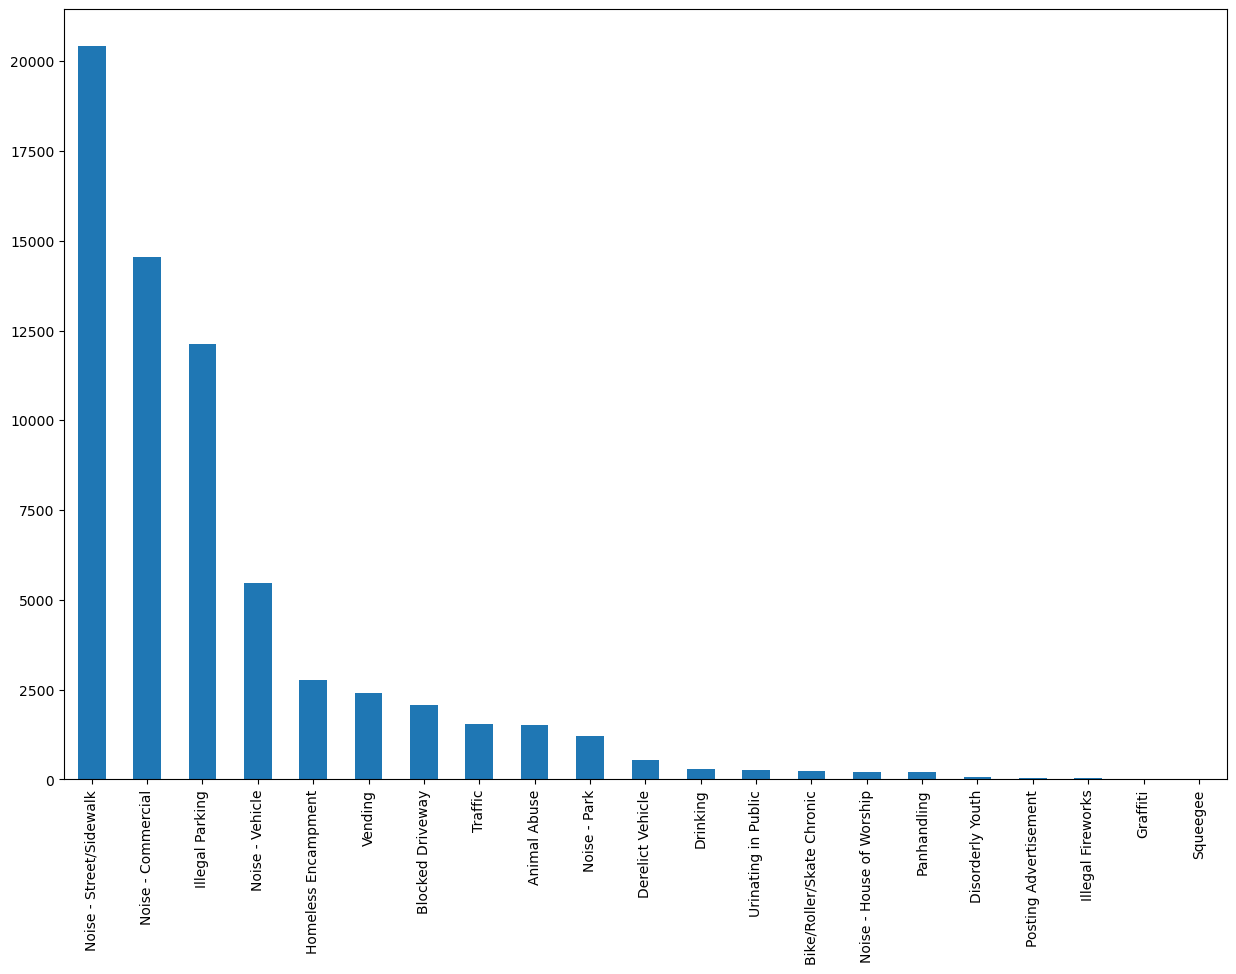

In [45]:
df_newyork.value_counts().plot(kind='bar',figsize=(15,10))

In [46]:
# Find the top 10 complaint types

In [47]:
df['Complaint Type'].value_counts().sort_values(ascending=False).head(10)

Blocked Driveway           76810
Illegal Parking            74532
Noise - Street/Sidewalk    48076
Noise - Commercial         35247
Derelict Vehicle           17588
Noise - Vehicle            17033
Animal Abuse                7768
Traffic                     4496
Homeless Encampment         4416
Noise - Park                4022
Name: Complaint Type, dtype: int64

In [48]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [49]:
# Display the various types of complaints in each city

x=df['Complaint Type'].groupby(df['City'])
x=pd.DataFrame(x)
x.columns=['City','Complaint Type']
print(x.to_markdown())

|    | City                | Complaint Type                                     |
|---:|:--------------------|:---------------------------------------------------|
|  0 | ARVERNE             | 3927         Illegal Parking                       |
|    |                     | 5256      Noise - Commercial                       |
|    |                     | 7932            Animal Abuse                       |
|    |                     | 8260            Animal Abuse                       |
|    |                     | 8685         Illegal Parking                       |
|    |                     |                  ...                               |
|    |                     | 289971              Graffiti                       |
|    |                     | 292894      Derelict Vehicle                       |
|    |                     | 292924       Illegal Parking                       |
|    |                     | 293989      Blocked Driveway                       |
|    |          

In [50]:
# Create a DataFrame, df_new, which contains cities as 
# columns and complaint types in rows

In [51]:
df_new=pd.crosstab(df['Complaint Type'],df['City'])
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknon City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,55,26,24,557,35,1,28,45,69,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,1,1,0,7,2,2,4,2,4,0
Blocked Driveway,35,2618,116,377,95,3,12754,28147,147,0,...,942,1548,262,2142,206,58,208,1059,1613,11
Derelict Vehicle,27,351,12,198,89,3,1952,5179,115,0,...,358,289,210,1766,10,46,227,308,247,2
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,...,2,2,0,23,2,0,1,0,1,0
Drinking,1,35,0,1,1,1,188,257,0,0,...,13,23,6,175,10,3,2,3,15,0
Graffiti,1,4,0,3,0,0,9,43,0,0,...,0,0,0,2,1,0,1,0,3,0


In [52]:
# Draw another chart that shows the types of complaints in 
# each city in a single chart, where different colors show the 
# different types of complaints

<AxesSubplot:ylabel='Complaint Type'>

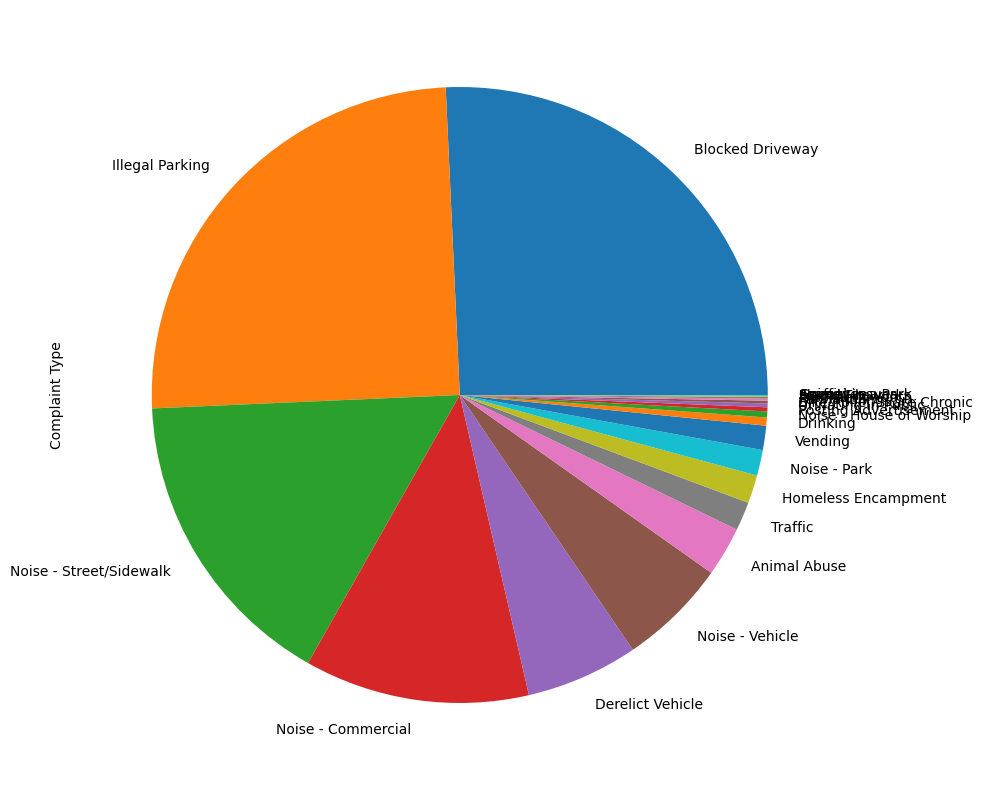

In [53]:
df['Complaint Type'].value_counts().plot(kind='pie',figsize=(15,10),shadow=False)

In [54]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [55]:
# Sort the complaint types based on the average 
# Request_Closing_Time grouping them for different
# locations
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [56]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,closing_time_seconds
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5176
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17491
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27914
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",2309
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",7231
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",11237
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",14733


In [57]:
df2=df.groupby(['Complaint Type','City']).agg({'closing_time_seconds':'mean'})
df2=df2.rename(columns={'closing_time_seconds':'avg_closing_time'})
df2

avg_closing_time
Complaint Type City                         
Agency Issues  Unknon City      18937.166667
Animal Abuse   ARVERNE           7753.052632
               ASTORIA          18000.608000
               BAYSIDE          11788.243243
               BELLEROSE        33466.000000
...                                      ...
Vending        SUNNYSIDE        29244.333333
               Unknon City      18422.000000
               WHITESTONE        8400.000000
               WOODHAVEN        10232.833333
               WOODSIDE         20527.533333

[778 rows x 1 columns]

In [58]:
# Visualize the average of Request_Closing_Time

In [79]:
df_ct=df.groupby(['Complaint Type']).agg({'closing_time_seconds':'mean'})
df_ct = pd.DataFrame(df_ct)
df_ct=df_ct.sort_values(['closing_time_seconds']).reset_index()
df_ct

,Complaint Type,closing_time_seconds
0,Animal in a Park,3005.000000
1,Posting Advertisement,6979.558642
2,Illegal Fireworks,9425.815476
3,Noise - House of Worship,10658.844995
4,Noise - Commercial,10768.414588
5,Traffic,11512.049155
6,Noise - Street/Sidewalk,11597.681463
7,Noise - Park,11720.108901
8,Noise - Vehicle,12154.427817
9,Urinating in Public,12326.261824


In [80]:
df_ct=df_ct.rename(columns={'closing_time_seconds':'Avg_closing_time'})
df_ct

,Complaint Type,Avg_closing_time
0,Animal in a Park,3005.000000
1,Posting Advertisement,6979.558642
2,Illegal Fireworks,9425.815476
3,Noise - House of Worship,10658.844995
4,Noise - Commercial,10768.414588
5,Traffic,11512.049155
6,Noise - Street/Sidewalk,11597.681463
7,Noise - Park,11720.108901
8,Noise - Vehicle,12154.427817
9,Urinating in Public,12326.261824


Text(0, 0.5, 'Average closing time')

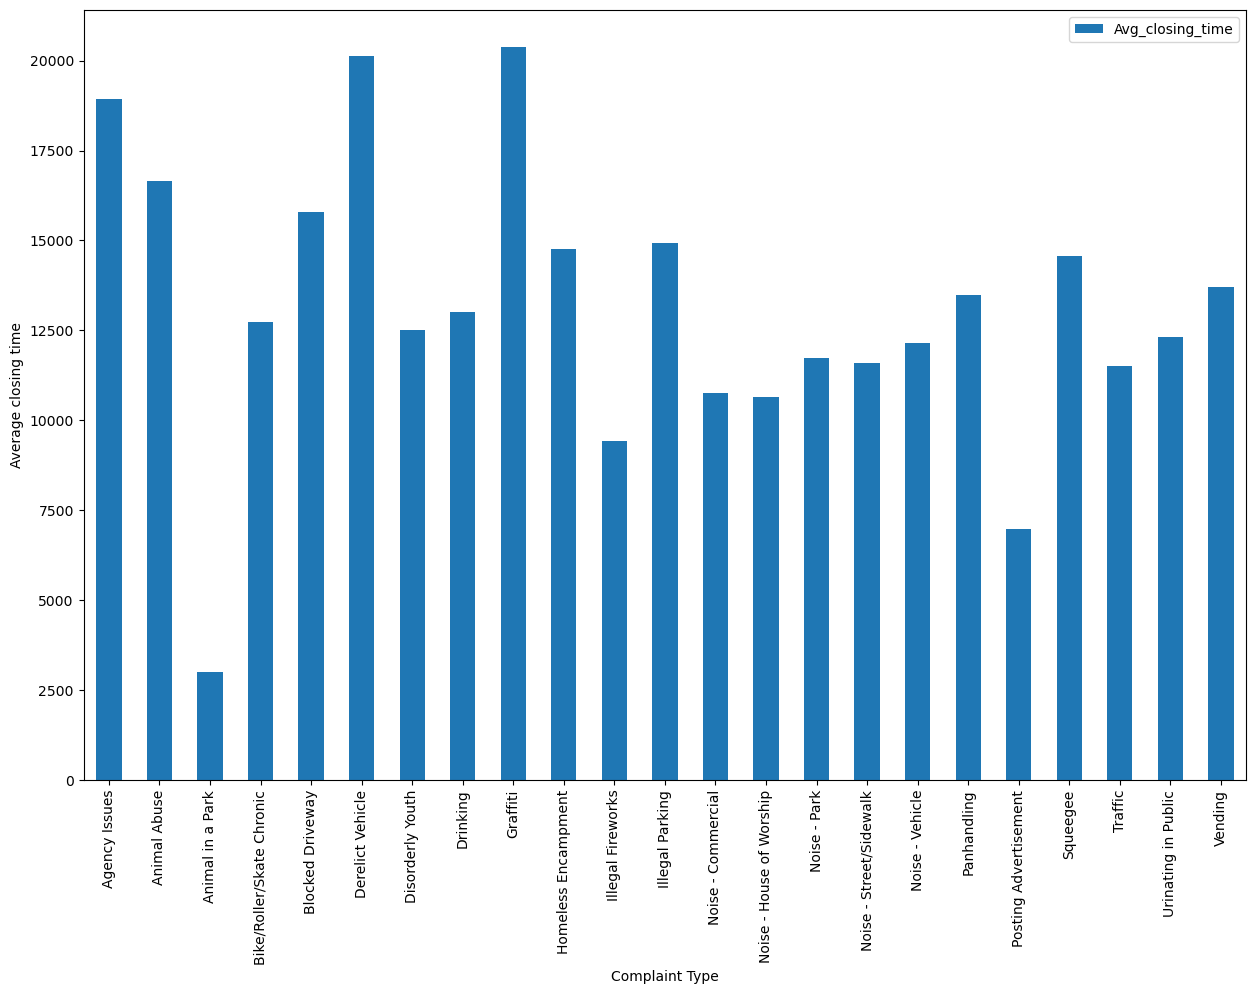

In [61]:
df_ct.plot(kind='bar',figsize=(15,10))
plt.ylabel('Average closing time')

# Perform a Kruskal-Wallis H test

In [63]:
! pip install pingouin
from pingouin import kruskal 

Defaulting to user installation because normal site-packages is not writeable


In [82]:
df5=df_ct
df5

,Complaint Type,Avg_closing_time
0,Animal in a Park,3005.000000
1,Posting Advertisement,6979.558642
2,Illegal Fireworks,9425.815476
3,Noise - House of Worship,10658.844995
4,Noise - Commercial,10768.414588
5,Traffic,11512.049155
6,Noise - Street/Sidewalk,11597.681463
7,Noise - Park,11720.108901
8,Noise - Vehicle,12154.427817
9,Urinating in Public,12326.261824


In [83]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df5['Complaint Type']= label_encoder.fit_transform(df5['Complaint Type'])

In [87]:
df5

,Complaint Type,Avg_closing_time
0,2,3005.000000
1,18,6979.558642
2,10,9425.815476
3,13,10658.844995
4,12,10768.414588
5,20,11512.049155
6,15,11597.681463
7,14,11720.108901
8,16,12154.427817
9,21,12326.261824


In [88]:
kruskal(data=df5,dv='Complaint Type',between='Avg_closing_time')

,Source,ddof1,H,p-unc
Kruskal,Avg_closing_time,22,22.0,0.459889


The Kruskal-Wallis Test uses the following null and alternative hypotheses:
The null hypothesis (H0): The median is equal across all groups.
The alternative hypothesis: (Ha): The median is not equal across all groups.
In this case, the test statistic is 22 and the corresponding p-value is 0.4598. Since this p-value is greater than 0.05, we can accept the null hypothesis.